In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_demograficos = pd.read_csv("/content/drive/MyDrive/Data/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922 - BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922genesis.csv")
df_histopatologia = pd.read_csv("/content/drive/MyDrive/Data/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv")
df_registro_tumo = pd.read_csv("/content/drive/MyDrive/Data/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv")
df_pesoEaltura = pd.read_csv("/content/drive/MyDrive/Data/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv")

In [4]:
df_demograficos = df_demograficos.drop(['Repeat Instrument', 
                                        'Repeat Instance',
                                        'UF de nascimento do paciente',
                                        'UF de residência do paciente',
                                        'Quantas vezes ficou gráfida?',
                                        'Número de partos',
                                        'Hormonioterapia ',
                                        'Amamentou na primeira gestação?',
                                        'Faz uso de métodos contraceptivo?',
                                        'Esquema de hormonioterapia',
                                        'Esquema de hormonioterapia',
                                        'Data do início Hormonioterapia adjuvante',
                                        'Data de início da Radioterapia',
                                        'Radioterapia',
                                        'Consumo de tabaco',
                                        'Abortou',
                                        'Atividade Física',
                                        'Data de início do tratamento quimioterapia',
                                        'Já fez uso de drogas?',
                                        'Data da cirurgia',
                                        "Data da última informação sobre o paciente"
                                        ], axis=1)

In [5]:
df_demograficos = df_demograficos.rename(columns={
                        "Record ID": "record_id",
                        "Idade do paciente ao primeiro diagnóstico": "idade_diagnostico", 
                        "Raça declarada (Biobanco)": "raca",
                        "Última informação do paciente": "ultima_informacao_paciente",
                        "Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]": "tempo_seguimento",
                        "Já ficou grávida?": "ja_gravida",
                        "Idade na primeira gestação": "gestacao_idade",
                        "Consumo de álcool": "consumo_alcool",
                        "Possui histórico familiar de câncer?": "historico_cancer",
                        "Grau de parentesco de familiar com cancer? (choice=primeiro (pais, irmãos, filhos))": "grau_parentesco_primeiro",
                        "Grau de parentesco de familiar com cancer? (choice=segundo (avós, tios e netos))": "grau_parentesco_segundo",
                        "Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))": "grau_parentesco_terceiro",
                        "Regime de Tratamento": "tratamento",
                        "Tipo de terapia anti-HER2 neoadjuvante": "anti_her2_neoadjuvante",
                        })

df_demograficos = df_demograficos.drop(df_demograficos[df_demograficos['tratamento'] == 'Paliativo'].index)
df_demograficos = df_demograficos.drop(df_demograficos[df_demograficos['tratamento'] == 'Não fez quimioterapia'].index)

lista_replace = [["Escolaridade",
                  "ANALFABETO", "SUPERIOR","ENS. FUNDAMENTAL COMPLETO","ENS. FUNDAMENTAL INCOMPLETO", "ENSINO MÉDIO","IGNORADA"],
                 ["Sexo", 
                  "Masculino", "Feminino"], 
                 ["raca",
                   "Asiático", "Outro", "Negro", "Pardo", "Branco"],
                 ["ja_gravida",
                  "Não", "Sim"],
                 ["consumo_alcool",
                  "não-informado","Bebe atualmente","Bebia no passado","Nunca bebeu"],
                 ["historico_cancer",
                  "Não","Sim"],
                 ["ultima_informacao_paciente",  
                  "Óbito por outras causas, SOE","Vivo, com câncer", "Obito por câncer","Vivo, SOE"],
                 ["grau_parentesco_primeiro", 
                  "Checked", "Unchecked"],
                 ["grau_parentesco_segundo",
                  "Checked", "Unchecked"],
                 ["grau_parentesco_terceiro",
                  "Checked", "Unchecked"],
                 ["tratamento",
                  "Terapia Neoadjuvante","Terapia Adjuvante"],
                 ["anti_her2_neoadjuvante",
                  "Trastuzumabe + Pertuzumabe","Trastuzumabe"],
                 ["Qual método? (choice=outros)",
                  "Checked", "Unchecked"],
                 ["Qual método? (choice=não informou)",
                  "Checked", "Unchecked"]
                 ]

for i in range(0, len(lista_replace)):
  for j in range(1, len(lista_replace[i])):
    df_demograficos[lista_replace[i][0]].replace(lista_replace[i][j], j-1, inplace=True)

In [6]:
np.random.seed(73)

lista = [
    ["Sexo", 0, 1], ['Por quanto tempo amamentou?',0, 100],['Idade da primeira mentruação'],['ultima_informacao_paciente'],
    ["Escolaridade", 0, 5], ["idade_diagnostico"] , ["raca", 0, 4],
    ["ja_gravida", 0 , 1], ["consumo_alcool", 0 , 3],["gestacao_idade"],
    ["historico_cancer"],["grau_parentesco_primeiro", 0, 1],["grau_parentesco_segundo", 0, 1], 
    ["tempo_seguimento"], ["grau_parentesco_terceiro", 0, 1], ["anti_her2_neoadjuvante",0, 1],
    ['tratamento',0, 1]
         ]

lista_normal = []

for i in range(0, len(lista)): 
  lista_normal.append(np.random.normal(df_demograficos[lista[i][0]].mean(skipna=True), 
                                       df_demograficos[lista[i][0]].std(skipna=True), 
                                       df_demograficos[f'{lista[i][0]}'].isnull().sum()))

  for j in range(0, len(lista_normal[i])):
    lista_normal[i][j] = round(lista_normal[i][j])

    if len(lista[i]) >= 2 : 
      if lista_normal[i][j] > lista[i][2]: 
        lista_normal[i][j] = lista[i][2]
      if lista_normal[i][j] < lista[i][1]: 
        lista_normal[i][j] = lista[i][1]

for i in range(0, len(lista)):
  df_demograficos[f'{lista[i][0]}'] = df_demograficos[f'{lista[i][0]}'].fillna(pd.Series(lista_normal[i], index=df_demograficos[f'{lista[i][0]}'].index[df_demograficos[f'{lista[i][0]}'].isnull()]))

In [7]:
df_histopatologia = pd.read_csv("/content/drive/MyDrive/Data/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv")

df_histopatologia = df_histopatologia.drop(['Repeat Instrument', 
                                        'Repeat Instance',
                                        'Receptor de progesterona (quantificação %)',
                                        'Receptorde Estrogênio (quantificação %)',
                                        'Indice H (Receptorde progesterona)',
                                        'Ki67 (%)',
                                        ], axis=1)

df_histopatologia = df_histopatologia.rename(columns={"Record ID": "record_id"})

lista_RecorId = df_histopatologia['record_id'].unique()

df_novo_histopatologia = df_histopatologia 
df_novo = pd.DataFrame(columns= df_histopatologia.columns)

for i in lista_RecorId:
    df_query = df_histopatologia.query(f'record_id == {i}')
    idx_linha_max = df_query.apply(lambda x: x.count(), axis=1).idxmax()
    linha_max = df_query.loc[idx_linha_max]
    df_novo = df_novo.append(linha_max, ignore_index=True)

df_histopatologia = df_novo

df_histopatologia

,record_id,Diagnostico primario (tipo histológico),Grau histológico,Subtipo tumoral,Receptor de estrogênio,Receptor de progesterona,Ki67 (>14%),HER2 por IHC,HER2 por FISH
0,302,NaN,NaN,5.0,positivo,positivo,NaN,+++ (positivo),NaN
1,710,NaN,NaN,2.0,positivo,negativo,positivo,0 (negativo),NaN
2,752,NaN,NaN,3.0,NaN,NaN,NaN,+++ (positivo),NaN
3,1367,NaN,NaN,2.0,positivo,positivo,positivo,0 (negativo),NaN
4,1589,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,NaN,5.0,positivo,positivo,NaN,+++ (positivo),NaN
...,...,...,...,...,...,...,...,...,...
4267,82123,NaN,NaN,3.0,NaN,NaN,positivo,+++ (positivo),NaN
4268,82124,NaN,NaN,3.0,NaN,NaN,NaN,+++ (positivo),NaN
4269,82131,NaN,NaN,3.0,NaN,NaN,positivo,+++ (positivo),NaN
4270,82205,NaN,NaN,4.0,negativo,negativo,positivo,0 (negativo),NaN


In [8]:
df_histopatologia = df_histopatologia.rename(columns={
                        "Grau histológico": "grau_histologico", 
                        "Subtipo tumoral": "subtipo_tumoral",
                        "Receptor de estrogênio": "receptor_estrogenio",
                        "Receptor de progesterona": "receptor_progesterona",
                        "Ki67 (>14%)": "ki67",
                        "HER2 por IHC": "her2_ihc",
                        "Diagnostico primario (tipo histológico)": "primeiro_diagnostico",
                        "HER2 por FISH": "her2_fish"
                        })

In [9]:
lista_replace = [["primeiro_diagnostico",
                  "NÃO-ESPECIAL - Carcinoma de mama ductal invasivo (CDI)/SOE", "Carcinoma de mama lobular invasivo",
                    "outros", "Carcinoma de mama metaplasico", "Carcinoma de mama mucinoso", "Carcinoma de mama papilifero",
                    "Carcinoma de mama medular", "Carcinoma de mama misto (ductal e lobular) invasivo", 
                    "Carcinoma de mama cistico adenoide", "Carcinoma mamário invasivo multifocal",
                    "Carcinoma de mama misto (ductal e micropapilífero) invasivo", "CARCINOMA MAMÁRIO INVASIVO DO TIPO APÓCRINO",
                    "Carcinoma de mama lobular in situ", "Carcinoma lobular pleomórfico", "Adenomioepitelioma maligno",
                    "Carcinoma de mama tubular", "Tumor PHYLLODES maligno", "Carcinoma de mama micropapilar"],
                 ["receptor_estrogenio", 
                  "positivo", "negativo", "não realizado"], 
                 ["receptor_progesterona",
                  "positivo", "negativo", "inconclusivo", "não realizado"],
                 ["ki67",
                  "positivo","negativo","inconclusivo","não realizado"],
                 ["her2_ihc",
                  " +++ (positivo)"," ++ (duvidoso)"," + (negativo)","indeterminado", "0 (negativo)"],
                 ["her2_fish",
                  "não realizado", "amplificado", "sem amplificação", "duvidoso", "reação não funcionou"]
                 ]

for i in range(0, len(lista_replace)):
  for j in range(1, len(lista_replace[i])):
    df_histopatologia[lista_replace[i][0]].replace(lista_replace[i][j], j-1, inplace=True)

In [10]:
np.random.seed(73)

lista = [
    ["primeiro_diagnostico", 0, 17], 
    ["grau_histologico"], ["subtipo_tumoral", 0 , 5] , ["receptor_estrogenio", 0, 2],
    ["receptor_progesterona", 0 , 3], ["ki67", 0 , 3],["her2_ihc", 0 , 4],
    ["her2_fish", 0, 4]
         ]

lista_normal = []

for i in range(0, len(lista)): 
  lista_normal.append(np.random.normal(df_histopatologia[lista[i][0]].mean(skipna=True), 
                                       df_histopatologia[lista[i][0]].std(skipna=True), 
                                       df_histopatologia[f'{lista[i][0]}'].isnull().sum()))

  for j in range(0, len(lista_normal[i])):
    lista_normal[i][j] = round(lista_normal[i][j])

    if len(lista[i]) >= 2 : 
      if lista_normal[i][j] > lista[i][2]: 
        lista_normal[i][j] = lista[i][2]
      if lista_normal[i][j] < lista[i][1]: 
        lista_normal[i][j] = lista[i][1]

for i in range(0, len(lista)):
  df_histopatologia[f'{lista[i][0]}'] = df_histopatologia[f'{lista[i][0]}'].fillna(pd.Series(lista_normal[i], index=df_histopatologia[f'{lista[i][0]}'].index[df_histopatologia[f'{lista[i][0]}'].isnull()]))

df_histopatologia

,record_id,primeiro_diagnostico,grau_histologico,subtipo_tumoral,receptor_estrogenio,receptor_progesterona,ki67,her2_ihc,her2_fish
0,302,2.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0
1,710,5.0,2.0,2.0,0.0,1.0,0.0,4.0,1.0
2,752,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
3,1367,1.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0
4,1589,0.0,2.0,5.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
4267,82123,0.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0
4268,82124,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
4269,82131,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
4270,82205,0.0,2.0,4.0,1.0,1.0,0.0,4.0,1.0


In [11]:
df_registro_tumo = df_registro_tumo.drop(['Repeat Instrument', 
                                        'Repeat Instance',
                                        'Data do tratamento',
                                        'Data de Recidiva'
                                        ], axis=1)

In [12]:
df_registro_tumo = df_registro_tumo.rename(columns={
                        "Record ID" : "record_id",
                        "Código da Topografia (CID-O)": "cid_o", 
                        "Código da Morfologia de acordo com o CID-O": "morfologia_cid_o",
                        "Estadio Clínico  ": "estadio_clinico",
                        "Grupo de Estadio Clínico": "grupo_estadio_clinico",
                        "Metastase ao DIAGNOSTICO - CID-O #4 ": "metastase_cido4",
                        "Classificação TNM Clínico - M": "classificacao_tnm_m",
                        "Classificação TNM Clínico - N": "classificacao_tnm_n",
                        "Classificação TNM Patológico - N": "classificacao_tnm_n_patologico",
                        "Classificação TNM Patológico - T": "classificacao_tnm_t_patologico",
                        "Com recidiva à distância": "recidiva_distancia",
                        "Com recidiva regional": "recidiva_regional",
                        "Com recidiva local": "recidiva_local",
                        "Combinação dos Tratamentos Realizados no Hospital": "combinacao_tratamentos",
                        "Lateralidade do tumor": "lateralidade_tumor",
                        "Tempo desde o diagnóstico até a primeira recidiva  ": "tempo_diagnostico",
                        "Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)": "descricao_morfologia",
                        "Descrição da Topografia ": "descricao_topografia",
                        "Metastase ao DIAGNOSTICO - CID-O #1": "metastase_cid1",
                        "Metastase ao DIAGNOSTICO - CID-O #2": "metastase_cid2",
                        "Metastase ao DIAGNOSTICO - CID-O #3": "metastase_cid3",
                        "Metastase ao DIAGNOSTICO - CID-O #4": "metastase_cid4",
                        })

lista_replace = [["grupo_estadio_clinico",
                  "0", "I", "II", "III", "III", "IV", "Y: Na", "X - nao foi possivel determinar"],
                 ["lateralidade_tumor", 
                  "Esquerda", "Direita", "não se aplica", "Bilateral"], 
                 ["combinacao_tratamentos",
                  "Cirurgia + Radio + Quimio + Hormonio", "Cirurgia + Quimioterapia",
                    "Outras combinações", "Cirurgia + Radio + Quimio", "Cirurgia + Radioterapia",
                    "Quimioterapia", "Radioterapia + Quimioterapia", "Nenhum tratamento", "Radioterapia",
                    "Cirurgia"],
                 ["classificacao_tnm_m",
                  "0", "1", "Y: Na", "X - nao foi possivel determinar", "1B", "1A"],
                 ["classificacao_tnm_n",
                  "0","1","2","3","1A","2A","3A","1B","2B","3B","3C","X - nao foi possivel determinar",
                  "Y: Na"],
                 ["classificacao_tnm_t_patologico",
                  "2","1C","3","1","1B","4B","IV","IS","4D","1MIC","Y: Na","2C","1A","4A","4C"],
                 ["classificacao_tnm_n_patologico",
                  "0", "1", "2", "3", "2A", "3A", "3B", "3C", "Y: Na", "X - nao foi possivel determinar","9", "10", "11"],
                 ["recidiva_distancia",
                  "Não", "Sim"],
                 ["recidiva_regional",
                 "Não", "Sim"],
                 ["recidiva_local",
                  "Não", "Sim"],
                 ['metastase_cid1',
                  'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
                 'C34 - Bronquios e Pulmoes',
                 'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
                 'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
                 'C71 - Encefalo',
                  'C40 - Ossos e Cartilagens Articulares Dos Membros',
                 'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
                 'C38 - Coração, Mediastino e Pleura,',
                  'C56 - Ovario',
                  'C15 - Esofago',
                 'C44 - Pele nao-melanoma',
                 'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
                 'C74 - Glândula Supra-renal (Glândula Adrenal)',
                 'C42 - Sistema hematopoiético e reticuloendotelial',
                  'C18 - Colon,',
                 'C67 - Bexiga'],
                 ['metastase_cid2', 
                  'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
                  'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
                  'C34 - Bronquios e Pulmoes',
                  'C40 - Ossos e Cartilagens Articulares Dos Membros',
                  'C71 - Encefalo',
                  'C50 - Mama',
                  'C38 - Coração, Mediastino e Pleura,',
                  'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
                  'C74 - Glândula Supra-renal (Glândula Adrenal)',
                  'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
                  'C44 - Pele nao-melanoma',
                  'C75 - Outras Glândulas Endócrinas e de Estruturas Relacionadas',
                  'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
                  'C70 - Meninges',
                  'C25 - Pancreas',
                  'C07 - Glandula Parotida',
                  'C56 - Ovario'],
                 ['metastase_cid3' ,
                  'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
                  'C64 - Rim, Exceto Pelve Renal',
                  'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
                  'C71 - Encefalo',
                  'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
                  'C38 - Coração, Mediastino e Pleura,',
                  'C34 - Bronquios e Pulmoes',
                  'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
                  'C40 - Ossos e Cartilagens Articulares Dos Membros',
                  'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
                  'C16 - Estomago',
                  'C42 - Sistema hematopoiético e reticuloendotelial',
                  'C74 - Glândula Supra-renal (Glândula Adrenal)',
                  'C25 - Pancreas'],
                 ['metastase_cid4',
                  'C38 - Coração, Mediastino e Pleura,',
                  'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
                  'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
                  'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
                  'C75 - Outras Glândulas Endócrinas e de Estruturas Relacionadas',
                  'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
                  'C56 - Ovario',
                  'C34 - Bronquios e Pulmoes',
                  'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
                  'C40 - Ossos e Cartilagens Articulares Dos Membros',
                  'C71 - Encefalo',
                  'C67 - Bexiga',
                  'C74 - Glândula Supra-renal (Glândula Adrenal)']
                 ]
                 
for i in range(0, len(lista_replace)):
  for j in range(1, len(lista_replace[i])):
    df_registro_tumo[lista_replace[i][0]].replace(lista_replace[i][j], j-1, inplace=True)

In [13]:
lista_RecorId = df_registro_tumo['record_id'].unique()

df_novo_histopatologia = df_registro_tumo 
df_novo = pd.DataFrame(columns= df_registro_tumo.columns)

for i in lista_RecorId:
    df_query = df_registro_tumo.query(f'record_id == {i}')
    idx_linha_max = df_query.apply(lambda x: x.count(), axis=1).idxmax()
    linha_max = df_query.loc[idx_linha_max]
    df_novo = df_novo.append(linha_max, ignore_index=True)

df_registro_tumo = df_novo

In [14]:
df_registro_tumo = df_registro_tumo[['record_id', 'Data da primeira consulta institucional [dt_pci]',
       'Data do diagnóstico', 'cid_o', 'morfologia_cid_o', 'estadio_clinico',
       'grupo_estadio_clinico', 'Classificação TNM Clínico - T',
       'classificacao_tnm_n', 'classificacao_tnm_m', 'metastase_cid1',
       'metastase_cid2', 'metastase_cid3', 'metastase_cid4',
       'combinacao_tratamentos', 'Ano do diagnóstico', 'lateralidade_tumor',
       'tempo_diagnostico','descricao_morfologia', 'descricao_topografia',
       'classificacao_tnm_n_patologico', 'classificacao_tnm_t_patologico',
       'recidiva_distancia', 'recidiva_regional', 'recidiva_local']]

In [17]:
np.random.seed(73)

lista = [['grupo_estadio_clinico'],['metastase_cid1'],['metastase_cid2'],['metastase_cid3'],['metastase_cid4'],['tempo_diagnostico'],['classificacao_tnm_n_patologico'],['classificacao_tnm_t_patologico'],
    ["combinacao_tratamentos",0, 22], ["tempo_diagnostico", 0 , 22] , ["classificacao_tnm_m", 0, 5],
    ["classificacao_tnm_n", 0 , 3], ["morfologia_cid_o", 0 , 22],["classificacao_tnm_n_patologico", 0 , 22],
    ["classificacao_tnm_t_patologico", 0, 22], ["grupo_estadio_clinico"], ["recidiva_distancia", 0 , 1], ["recidiva_regional"], ["recidiva_local", 0, 1]
         ]

lista_normal = []

for i in range(0, len(lista)):
  lista_normal.append(np.random.normal(df_registro_tumo[lista[i][0]].mean(skipna=True),
                                      df_registro_tumo[lista[i][0]].std(skipna=True),
                                      df_registro_tumo[f'{lista[i][0]}'].isnull().sum()))
  for j in range(0, len(lista_normal[i])):
    lista_normal[i][j] = round(lista_normal[i][j])

    if len(lista[i]) >= 2 : 
      if lista_normal[i][j] > lista[i][2]: 
        lista_normal[i][j] = lista[i][2]
      if lista_normal[i][j] < lista[i][1]: 
        lista_normal[i][j] = lista[i][1]

null_cid_o = df_registro_tumo.cid_o.isnull().sum()
lista_normal_cid_o = []

null_descricao_topografia = df_registro_tumo.descricao_topografia.isnull().sum()
lista_normal_descricao_topografia = []

null_descricao_morfologia = df_registro_tumo.descricao_morfologia.isnull().sum()
lista_normal_descricao_morfologia = []

for i in range(0, null_cid_o):
  lista_normal_cid_o.append("C509")

for i in range(0, null_descricao_morfologia): 
  lista_normal_descricao_morfologia.append("CARCINOMA DUCTAL INFILTRANTE SOE")

for i in range(0, null_descricao_topografia): 
  lista_normal_descricao_topografia.append("MAMA SOE (EXCLUI PELE DA MAMA C44.5)")

for i in range(0, len(lista)):
  df_registro_tumo[f'{lista[i][0]}'] = df_registro_tumo[f'{lista[i][0]}'].fillna(pd.Series(lista_normal[i], index=df_registro_tumo[f'{lista[i][0]}'].index[df_registro_tumo[f'{lista[i][0]}'].isnull()]))

df_registro_tumo

<ipython-input-17-3d2004edff3f>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_registro_tumo[f'{lista[i][0]}'] = df_registro_tumo[f'{lista[i][0]}'].fillna(pd.Series(lista_normal[i], index=df_registro_tumo[f'{lista[i][0]}'].index[df_registro_tumo[f'{lista[i][0]}'].isnull()]))


,record_id,Data da primeira consulta institucional [dt_pci],Data do diagnóstico,cid_o,morfologia_cid_o,estadio_clinico,grupo_estadio_clinico,Classificação TNM Clínico - T,classificacao_tnm_n,classificacao_tnm_m,...,Ano do diagnóstico,lateralidade_tumor,tempo_diagnostico,descricao_morfologia,descricao_topografia,classificacao_tnm_n_patologico,classificacao_tnm_t_patologico,recidiva_distancia,recidiva_regional,recidiva_local
0,302,2008-03-22,2008-03-23,C504,85003.0,IIA,2.0,2,0.0,0.0,...,2008.0,0.0,476.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,2.0,0.0,0.0,0.0,0.0
1,710,2006-11-11,2007-11-11,C508,85003.0,IIIA,3.0,3,1.0,0.0,...,2008.0,0.0,2442.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA LESAO SOBREPOSTA DA,0.0,-3.0,0.0,1.0,1.0
2,752,2007-09-25,2007-12-18,C509,84803.0,IIA,2.0,2,0.0,0.0,...,2008.0,0.0,473.0,ADENOCARCINOMA MUCINOSO,MAMA SOE (EXCLUI PELE DA MAMA C44.5),9.0,0.0,0.0,0.0,0.0
3,1367,2008-02-03,2008-02-06,C505,85003.0,IIA,2.0,1,1.0,0.0,...,2008.0,0.0,890.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE INFERIOR EXTERNO DA,1.0,12.0,0.0,1.0,0.0
4,1589,2008-05-15,2008-05-21,C508,85003.0,IIB,2.0,2,1.0,0.0,...,2008.0,1.0,1223.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA LESAO SOBREPOSTA DA,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,82123,2020-12-04,2020-10-10,C504,85003.0,IIB,3.0,3,0.0,0.0,...,2020.0,1.0,654.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,2.0,8.0,0.0,0.0,0.0
4268,82124,2020-06-20,2020-09-05,C509,85203.0,IV,2.0,4D,1.0,1.0,...,2020.0,0.0,582.0,CARCINOMA LOBULAR SOE,MAMA SOE (EXCLUI PELE DA MAMA C44.5),0.0,-6.0,0.0,0.0,0.0
4269,82131,2020-11-01,2019-12-23,C502,85203.0,IIIA,4.0,3,1.0,0.0,...,2020.0,1.0,14.0,CARCINOMA LOBULAR SOE,MAMA QUADRANTE SUPERIOR INTERNO DA,-2.0,5.0,0.0,0.0,0.0
4270,82205,2021-02-28,2020-11-07,C504,85003.0,IV,2.0,4D,1.0,1.0,...,2020.0,0.0,1151.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,3.0,2.0,0.0,0.0,1.0


In [18]:
df_pesoEaltura = df_pesoEaltura.rename(columns={"Record ID": "record_id",
                                                "Data: ": "data",
                                                "Peso": "peso",
                                                "Altura (em centimetros)": "altura"})

lista_RecorId = df_pesoEaltura['record_id'].unique()
df_novo = pd.DataFrame()

for i in lista_RecorId: 
    df_query = df_pesoEaltura.query(f'record_id == {i}')
    df_query = df_query.sort_values(by='data')

    df_row_first = df_query.iloc[0]

    if len(df_query) > 1: 
      df_row_second = df_query.iloc[1]

      numero = len(df_query) - 1

      for col in ['altura', 'peso', 'IMC']:
        while (not pd.isna(df_row_second[col].all())) and (not pd.isna(df_row_second['data'])) and (numero > 1):
          df_row_second = df_query.iloc[len(df_query) - numero]
          numero -= 1

      df_row_first['ultimo_peso'] = df_row_second['peso']
      df_row_first['ultima_altura'] = df_row_second['altura']
      df_row_first['ultimo_IMC'] = df_row_second['IMC']
      df_row_first['ultima_data'] = df_row_second['data']
      
      df_novo = df_novo.append(df_row_first, ignore_index=True)
      
    else: 
      df_novo = df_novo.append(df_row_first, ignore_index=True)

df_novo = df_novo.rename(columns={
                        "peso": "primeiro_peso", 
                        "altura": "primeira_altura",
                        "IMC": "primeiro_IMC"
                        })

df_pesoEaltura = df_novo

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


In [19]:
np.random.seed(73)

df_pesoEaltura['primeiro_IMC'] = (df_pesoEaltura['primeiro_peso'] / pow(df_pesoEaltura['primeira_altura']/100, 2))

lista_pesoEaltura = ["primeiro_peso", "primeira_altura", "ultimo_peso", "ultima_altura", "primeiro_IMC"]
lista_normal = []

for i in lista_pesoEaltura: 
  df_pesoEaltura[i] = df_pesoEaltura[i].fillna(pd.Series(np.random.normal(df_pesoEaltura[i].std(skipna=True), 
                                                                          df_pesoEaltura[i].std(skipna=True), 
                                                                          df_pesoEaltura[i].isnull().sum()), 
                                                         index=df_pesoEaltura[i].index[df_pesoEaltura[i].isnull()]))

df_pesoEaltura['ultimo_IMC'] = (df_pesoEaltura['ultimo_peso'] / pow(df_pesoEaltura['ultima_altura']/100, 2))

df_pesoEaltura

,record_id,Repeat Instrument,Repeat Instance,data,primeiro_peso,primeira_altura,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,ultima_data
0,302.0,Dados Antropometricos,20.0,2009-01-02,57.80,158.0,23.153341,64.900000,158.0,25.997436,2013-05-23
1,710.0,Dados Antropometricos,18.0,2008-07-12,61.00,156.0,25.065746,63.800000,155.0,26.555671,2020-10-31
2,752.0,Dados Antropometricos,2.0,2009-12-03,84.00,152.0,36.357341,85.900000,152.0,37.179709,2013-11-27
3,1367.0,Dados Antropometricos,1.0,2010-04-28,57.90,143.0,28.314343,51.000000,143.0,24.940095,2011-07-27
4,1589.0,Dados Antropometricos,12.0,2009-04-03,63.20,167.0,22.661264,63.650000,167.0,22.822618,2013-09-05
...,...,...,...,...,...,...,...,...,...,...,...
4267,82123.0,Dados Antropometricos,5.0,2021-02-07,85.40,153.0,36.481695,24.018708,154.0,10.127639,2021-10-25
4268,82124.0,Dados Antropometricos,1.0,2020-11-10,81.10,151.0,35.568615,78.000000,151.0,34.209026,2020-12-05
4269,82131.0,Dados Antropometricos,1.0,2020-11-01,71.40,156.5,29.152079,75.650000,156.0,31.085634,2021-01-04
4270,82205.0,Dados Antropometricos,4.0,2021-02-28,135.85,174.0,44.870525,23.936242,174.0,7.906012,2021-08-24


In [20]:
df_pesoEaltura['diferenca_peso'] = df_pesoEaltura['ultimo_peso'] - df_pesoEaltura['primeiro_peso']
df_pesoEaltura['coef_peso'] = df_pesoEaltura['ultimo_peso'] / df_pesoEaltura['primeiro_peso']

df_pesoEaltura['ultima_data'] = pd.to_datetime(df_pesoEaltura['ultima_data'])
df_pesoEaltura['data'] = pd.to_datetime(df_pesoEaltura['data'])

df_pesoEaltura['diferenca_altura'] = df_pesoEaltura['ultima_data'] - df_pesoEaltura['data']

df_pesoEaltura['diferenca_tempo'] = (df_pesoEaltura['ultima_data'] - df_pesoEaltura['data']).dt.days
df_pesoEaltura['coef_peso_tempo'] = df_pesoEaltura['diferenca_peso'] / df_pesoEaltura['diferenca_tempo']

df_pesoEaltura['Repeat Instrument'] = df_pesoEaltura['Repeat Instrument'].fillna(0)
df_pesoEaltura['Repeat Instance'] = df_pesoEaltura['Repeat Instance'].fillna(0)
df_pesoEaltura['data'] = df_pesoEaltura['data'].fillna(0)
df_pesoEaltura['ultima_data'] = df_pesoEaltura['ultima_data'].fillna(0)
df_pesoEaltura['diferenca_altura'] = df_pesoEaltura['diferenca_altura'].fillna(pd.Timedelta(0))

df_pesoEaltura['diferenca_tempo'] = df_pesoEaltura['diferenca_tempo'].fillna(0)
df_pesoEaltura['coef_peso_tempo'] = df_pesoEaltura['coef_peso_tempo'].fillna(0)

In [21]:
merged_df = pd.merge(df_demograficos, df_histopatologia, on='record_id', how='inner')
merged_df = pd.merge(merged_df, df_registro_tumo, on='record_id', how='inner')
merged_df = pd.merge(merged_df, df_pesoEaltura, on='record_id', how='inner')

In [22]:
merged_df

,record_id,Escolaridade,idade_diagnostico,Sexo,raca,ultima_informacao_paciente,tempo_seguimento,ja_gravida,gestacao_idade,Por quanto tempo amamentou?,...,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,ultima_data,diferenca_peso,coef_peso,diferenca_altura,diferenca_tempo,coef_peso_tempo
0,302,3.0,51.0,1.0,2.0,2.0,2225.0,1.0,30.0,25.0,...,23.153341,64.900000,158.0,25.997436,2013-05-23 00:00:00,7.100000,1.122837,1602 days,1602.0,0.004432
1,710,4.0,58.0,1.0,4.0,3.0,3294.0,1.0,16.0,28.0,...,25.065746,63.800000,155.0,26.555671,2020-10-31 00:00:00,2.800000,1.045902,4494 days,4494.0,0.000623
2,752,3.0,56.0,1.0,3.0,3.0,4153.0,1.0,24.0,11.0,...,36.357341,85.900000,152.0,37.179709,2013-11-27 00:00:00,1.900000,1.022619,1455 days,1455.0,0.001306
3,1367,3.0,63.0,1.0,3.0,2.0,1331.0,1.0,30.0,14.0,...,28.314343,51.000000,143.0,24.940095,2011-07-27 00:00:00,-6.900000,0.880829,455 days,455.0,-0.015165
4,1589,2.0,42.0,1.0,2.0,3.0,3290.0,1.0,18.0,1.0,...,22.661264,63.650000,167.0,22.822618,2013-09-05 00:00:00,0.450000,1.007120,1616 days,1616.0,0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,82123,4.0,47.0,1.0,1.0,3.0,380.0,1.0,30.0,0.0,...,36.481695,24.018708,154.0,10.127639,2021-10-25 00:00:00,-61.381292,0.281250,260 days,260.0,-0.236082
4173,82124,4.0,41.0,1.0,2.0,2.0,138.0,1.0,27.0,24.0,...,35.568615,78.000000,151.0,34.209026,2020-12-05 00:00:00,-3.100000,0.961776,25 days,25.0,-0.124000
4174,82131,4.0,59.0,1.0,4.0,2.0,900.0,1.0,26.0,7.0,...,29.152079,75.650000,156.0,31.085634,2021-01-04 00:00:00,4.250000,1.059524,64 days,64.0,0.066406
4175,82205,5.0,29.0,1.0,4.0,2.0,538.0,1.0,21.0,0.0,...,44.870525,23.936242,174.0,7.906012,2021-08-24 00:00:00,-111.913758,0.176196,177 days,177.0,-0.632281


Found existing installation: matplotlib 3.7.0
Uninstalling matplotlib-3.7.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.7.0-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.7.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.7.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 76.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dython 0.7.3 requires matplotli

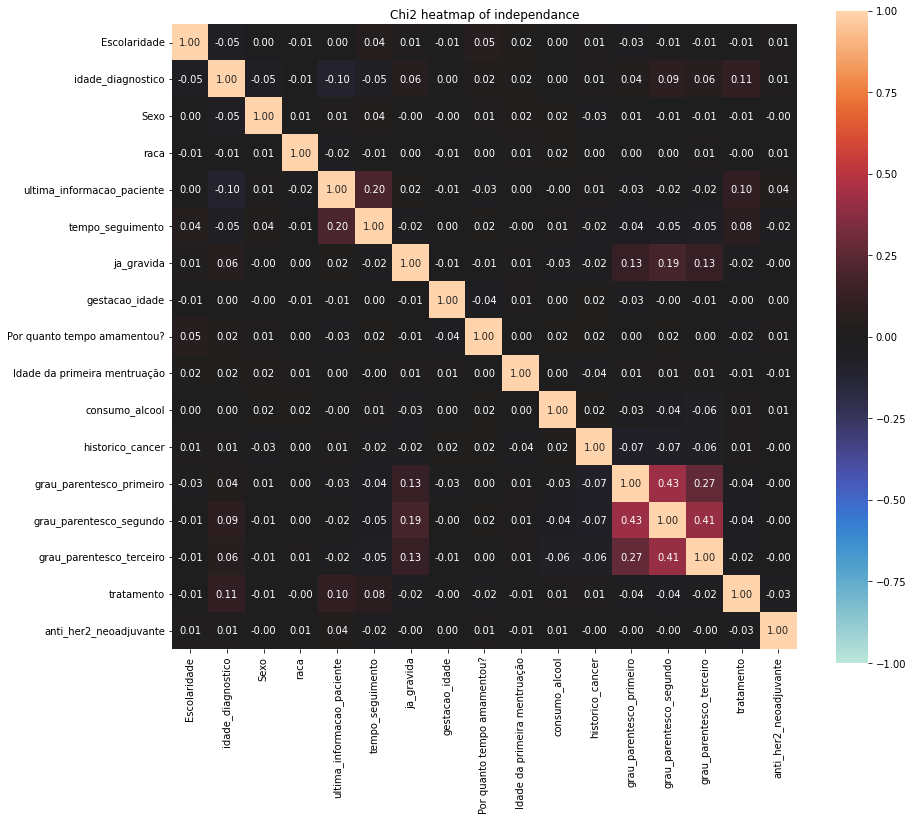

In [26]:
df_demograficos_chi2 = df_demograficos[['Escolaridade','idade_diagnostico','Sexo','raca','ultima_informacao_paciente','tempo_seguimento','ja_gravida','gestacao_idade','Por quanto tempo amamentou?'
,'Idade da primeira mentruação','consumo_alcool','historico_cancer','grau_parentesco_primeiro','grau_parentesco_segundo','grau_parentesco_terceiro',
'tratamento','anti_her2_neoadjuvante']]

from dython.nominal import associations
associations(df_demograficos_chi2,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

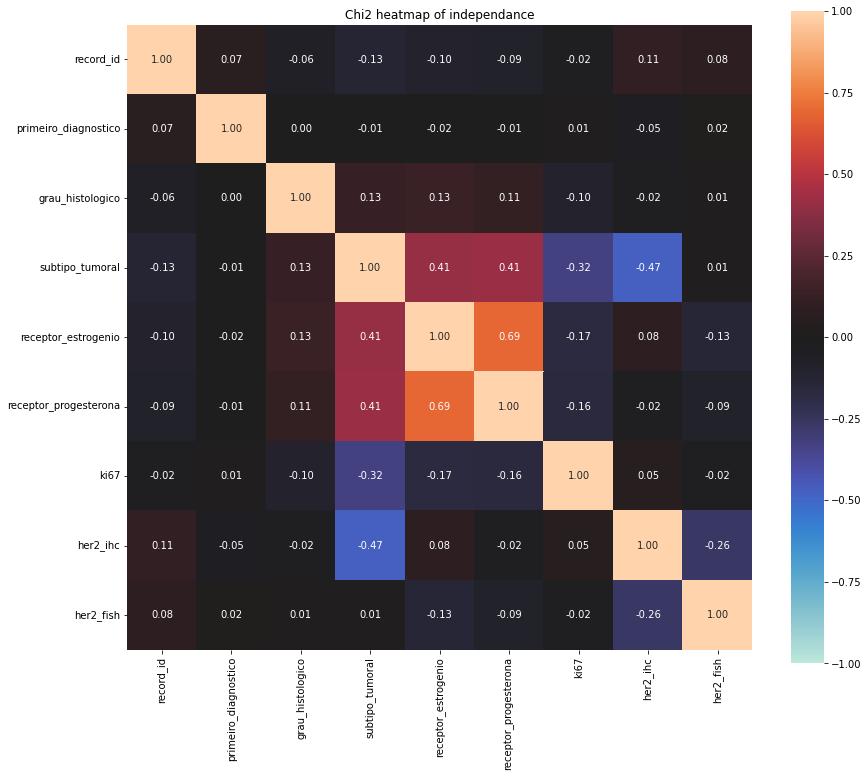

In [27]:
associations(df_histopatologia,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

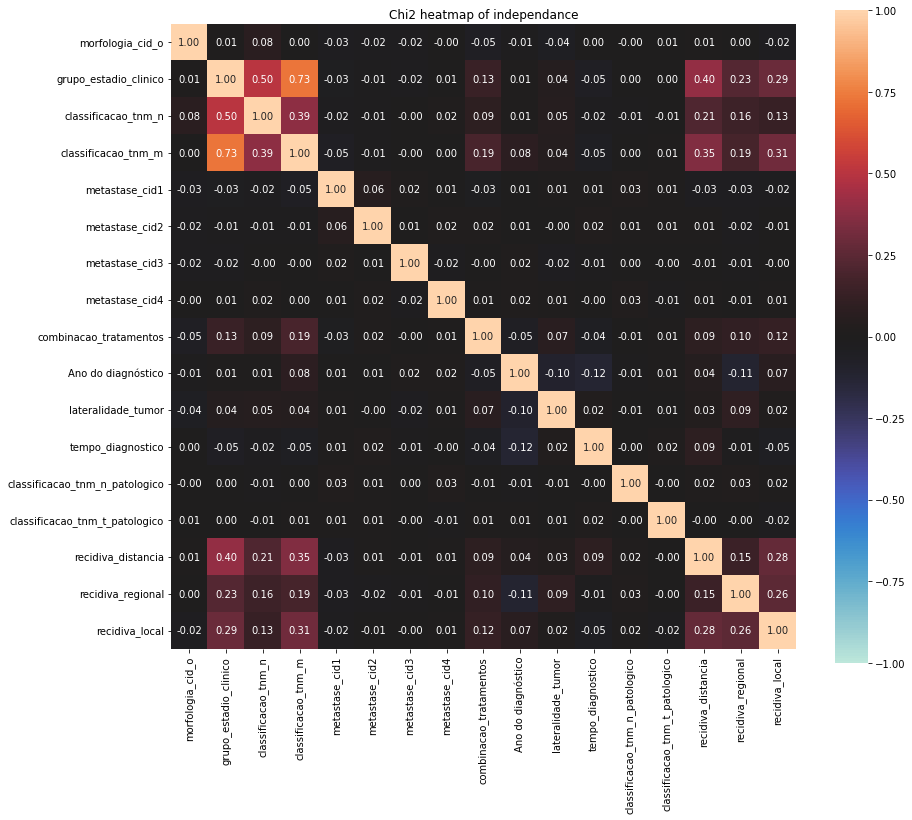

In [28]:
df_registro_tumo.describe()
df_registro_tumo_chi2 = df_registro_tumo[[
    'morfologia_cid_o','grupo_estadio_clinico','classificacao_tnm_n','classificacao_tnm_m','metastase_cid1','metastase_cid2','metastase_cid3','metastase_cid4','combinacao_tratamentos','Ano do diagnóstico',
    'lateralidade_tumor','tempo_diagnostico','classificacao_tnm_n_patologico','classificacao_tnm_t_patologico','recidiva_distancia','recidiva_regional','recidiva_local'
]]
associations(df_registro_tumo_chi2,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

In [29]:
np.random.seed(73)


def exclui_outliers(df, col_name):
  intervalo = 2.7 * df[col_name].std()
  media = df[col_name].mean()
  df.loc[df[col_name] < (media - intervalo), col_name] = media
  df.loc[df[col_name] > (media + intervalo), col_name] = media

numerical_cols = ['Escolaridade', 'idade_diagnostico', 'Sexo', 'raca',
       'ultima_informacao_paciente', 'tempo_seguimento', 'ja_gravida',
       'gestacao_idade', 'Por quanto tempo amamentou?',
       'Idade da primeira mentruação', 'Qual método? (choice=outros)',
       'Qual método? (choice=não informou)', 'consumo_alcool',
       'historico_cancer', 'grau_parentesco_primeiro',
       'grau_parentesco_segundo', 'grau_parentesco_terceiro', 'tratamento',
       'anti_her2_neoadjuvante', 'primeiro_diagnostico', 'grau_histologico',
       'subtipo_tumoral', 'receptor_estrogenio', 'receptor_progesterona',
       'ki67', 'her2_ihc', 'her2_fish', 'morfologia_cid_o',
       'grupo_estadio_clinico', 'classificacao_tnm_n', 'classificacao_tnm_m',
       'metastase_cid1', 'metastase_cid2', 'metastase_cid3', 'metastase_cid4',
       'combinacao_tratamentos', 'Ano do diagnóstico', 'lateralidade_tumor',
       'tempo_diagnostico', 'classificacao_tnm_n_patologico',
       'classificacao_tnm_t_patologico', 'recidiva_distancia',
       'recidiva_regional', 'recidiva_local', 'Repeat Instance',
       'primeiro_peso', 'primeira_altura', 'primeiro_IMC', 'ultimo_peso',
       'ultima_altura', 'ultimo_IMC', 'diferenca_peso', 'coef_peso',
       'diferenca_altura', 'diferenca_tempo', 'coef_peso_tempo']

for col in numerical_cols:
  exclui_outliers(merged_df, col)

merged_df.fillna(merged_df.mean(), inplace=True)

<ipython-input-29-beb20e2ef602>:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df.fillna(merged_df.mean(), inplace=True)


In [30]:
merged_df.describe()

,record_id,Escolaridade,idade_diagnostico,Sexo,raca,ultima_informacao_paciente,tempo_seguimento,ja_gravida,gestacao_idade,Por quanto tempo amamentou?,...,primeira_altura,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,diferenca_peso,coef_peso,diferenca_altura,diferenca_tempo,coef_peso_tempo
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,...,4177.000000,4177.000000,4177.000000,4177.000000,4.177000e+03,4177.000000,4177.000000,4177,4177.000000,4177.000000
mean,48515.347379,4.195335,54.103733,0.999934,2.976035,2.625882,1466.062895,0.999994,23.072462,20.889350,...,133.264030,23.752722,52.588030,131.855124,inf,-7.790911,0.929656,1128 days 16:59:35.805740800,1128.708053,-0.004524
std,20802.657675,1.188599,13.375077,0.000731,0.891188,0.581177,832.861193,0.000117,5.317827,17.882203,...,55.078511,10.469054,29.049917,56.154396,NaN,24.121974,1.667521,958 days 03:13:00.865337488,958.134038,0.031780
min,302.000000,1.000000,22.000000,0.991860,1.000000,1.000000,0.000000,0.997606,9.000000,0.000000,...,-10.802815,-5.564142,-25.204790,-12.099034,-6.689086e+07,-83.163195,-17.153377,0 days 00:00:00,0.000000,-0.318912
25%,30633.000000,4.000000,44.000000,1.000000,2.000000,2.000000,968.000000,1.000000,19.000000,5.000000,...,149.000000,20.944583,27.904009,149.000000,2.135276e+01,-10.369817,0.694915,249 days 00:00:00,249.000000,-0.006440
50%,53114.000000,5.000000,54.000000,1.000000,3.000000,3.000000,1289.000000,1.000000,23.000000,18.000000,...,155.000000,26.095347,59.750000,155.000000,2.719179e+01,-1.000000,0.980309,1039 days 00:00:00,1039.000000,0.000000
75%,66610.000000,5.000000,63.000000,1.000000,4.000000,3.000000,1799.000000,1.000000,27.000000,33.000000,...,160.500000,30.309695,72.950000,160.000000,3.351275e+01,3.450000,1.047682,1697 days 00:00:00,1697.000000,0.001883
max,82240.000000,5.000000,90.000000,1.000000,4.000000,3.000000,3810.000000,1.000000,38.000000,75.000000,...,188.000000,51.518647,129.000000,185.000000,inf,65.730361,19.813735,3918 days 00:00:00,3918.000000,0.290723


In [31]:
merged_df

,record_id,Escolaridade,idade_diagnostico,Sexo,raca,ultima_informacao_paciente,tempo_seguimento,ja_gravida,gestacao_idade,Por quanto tempo amamentou?,...,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,ultima_data,diferenca_peso,coef_peso,diferenca_altura,diferenca_tempo,coef_peso_tempo
0,302,3.0,51.0,1.0,2.0,2.0,2225.000000,1.0,30.0,25.0,...,23.153341,64.900000,158.0,25.997436,2013-05-23 00:00:00,7.100000,1.122837,1602 days 00:00:00,1602.000000,0.004432
1,710,4.0,58.0,1.0,4.0,3.0,3294.000000,1.0,16.0,28.0,...,25.065746,63.800000,155.0,26.555671,2020-10-31 00:00:00,2.800000,1.045902,1168 days 08:14:21.862580800,1168.343309,0.000623
2,752,3.0,56.0,1.0,3.0,3.0,1484.990424,1.0,24.0,11.0,...,36.357341,85.900000,152.0,37.179709,2013-11-27 00:00:00,1.900000,1.022619,1455 days 00:00:00,1455.000000,0.001306
3,1367,3.0,63.0,1.0,3.0,2.0,1331.000000,1.0,30.0,14.0,...,28.314343,51.000000,143.0,24.940095,2011-07-27 00:00:00,-6.900000,0.880829,455 days 00:00:00,455.000000,-0.015165
4,1589,2.0,42.0,1.0,2.0,3.0,3290.000000,1.0,18.0,1.0,...,22.661264,63.650000,167.0,22.822618,2013-09-05 00:00:00,0.450000,1.007120,1616 days 00:00:00,1616.000000,0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,82123,4.0,47.0,1.0,1.0,3.0,380.000000,1.0,30.0,0.0,...,36.481695,24.018708,154.0,10.127639,2021-10-25 00:00:00,-61.381292,0.281250,260 days 00:00:00,260.000000,-0.236082
4173,82124,4.0,41.0,1.0,2.0,2.0,138.000000,1.0,27.0,24.0,...,35.568615,78.000000,151.0,34.209026,2020-12-05 00:00:00,-3.100000,0.961776,25 days 00:00:00,25.000000,-0.124000
4174,82131,4.0,59.0,1.0,4.0,2.0,900.000000,1.0,26.0,7.0,...,29.152079,75.650000,156.0,31.085634,2021-01-04 00:00:00,4.250000,1.059524,64 days 00:00:00,64.000000,0.066406
4175,82205,5.0,29.0,1.0,4.0,2.0,538.000000,1.0,21.0,0.0,...,44.870525,23.936242,174.0,7.906012,2021-08-24 00:00:00,-8.072470,0.176196,177 days 00:00:00,177.000000,-0.006687


In [32]:
#grau de parentesco primeiro tem muito a ver com o segundo e com o terceiro logo o cancer tem uma relação muito forte com a genetica
#receptor de progesterona esta estritamente relacionado a receptor de progesterona

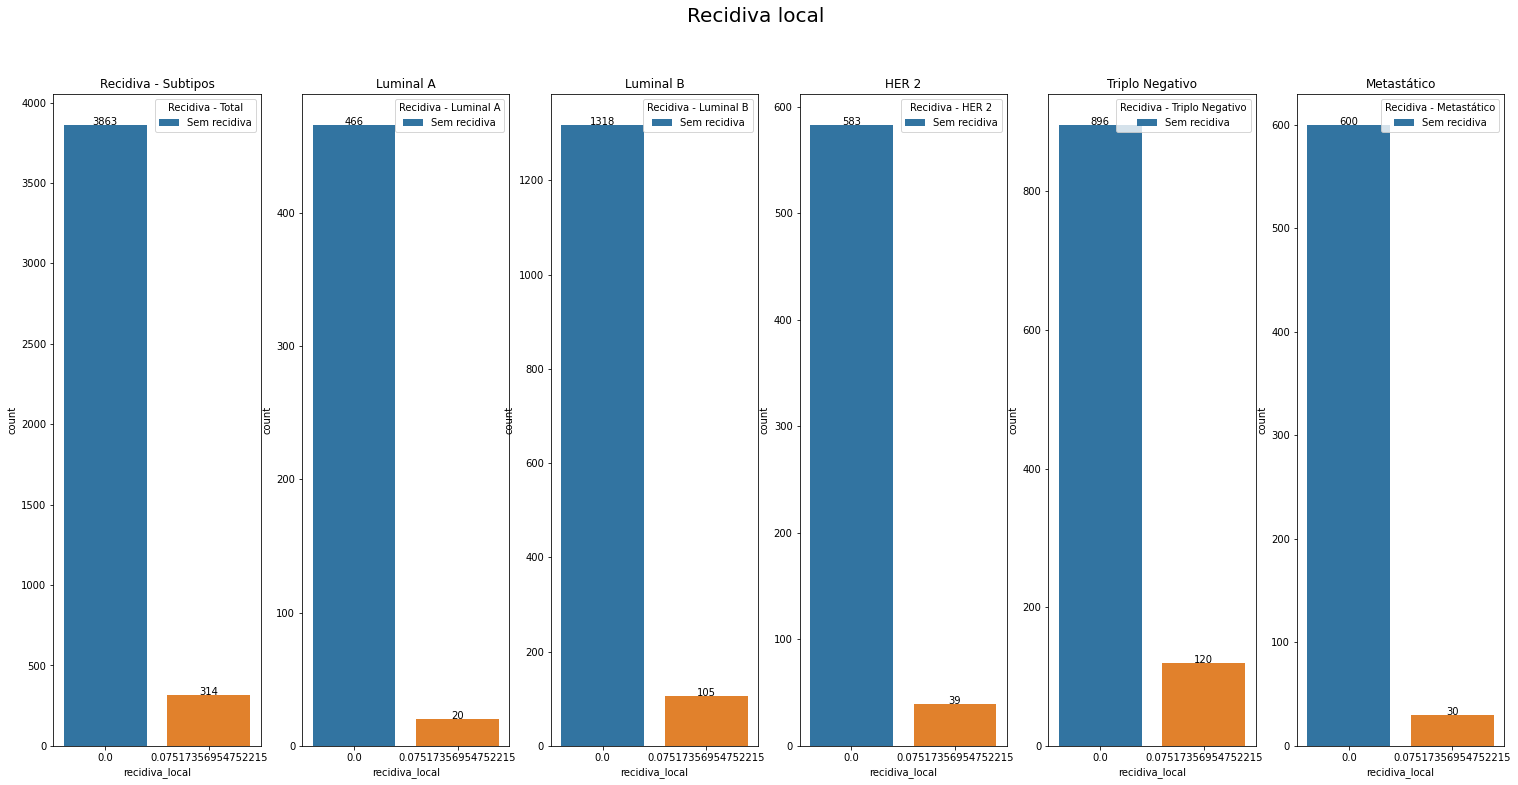

In [33]:
tumor1 = merged_df.query('subtipo_tumoral == 1')
tumor2 = merged_df.query('subtipo_tumoral == 2')
tumor3 = merged_df.query('subtipo_tumoral == 3')
tumor4 = merged_df.query('subtipo_tumoral == 4')
tumor5 = merged_df.query('subtipo_tumoral == 5')
figura = plt.figure(figsize=(26, 12))
figura.suptitle('Recidiva local', fontsize=20)
figura.add_subplot(161)
grafico = sns.countplot(x='recidiva_local', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_local', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_local', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_local', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_local', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_local', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

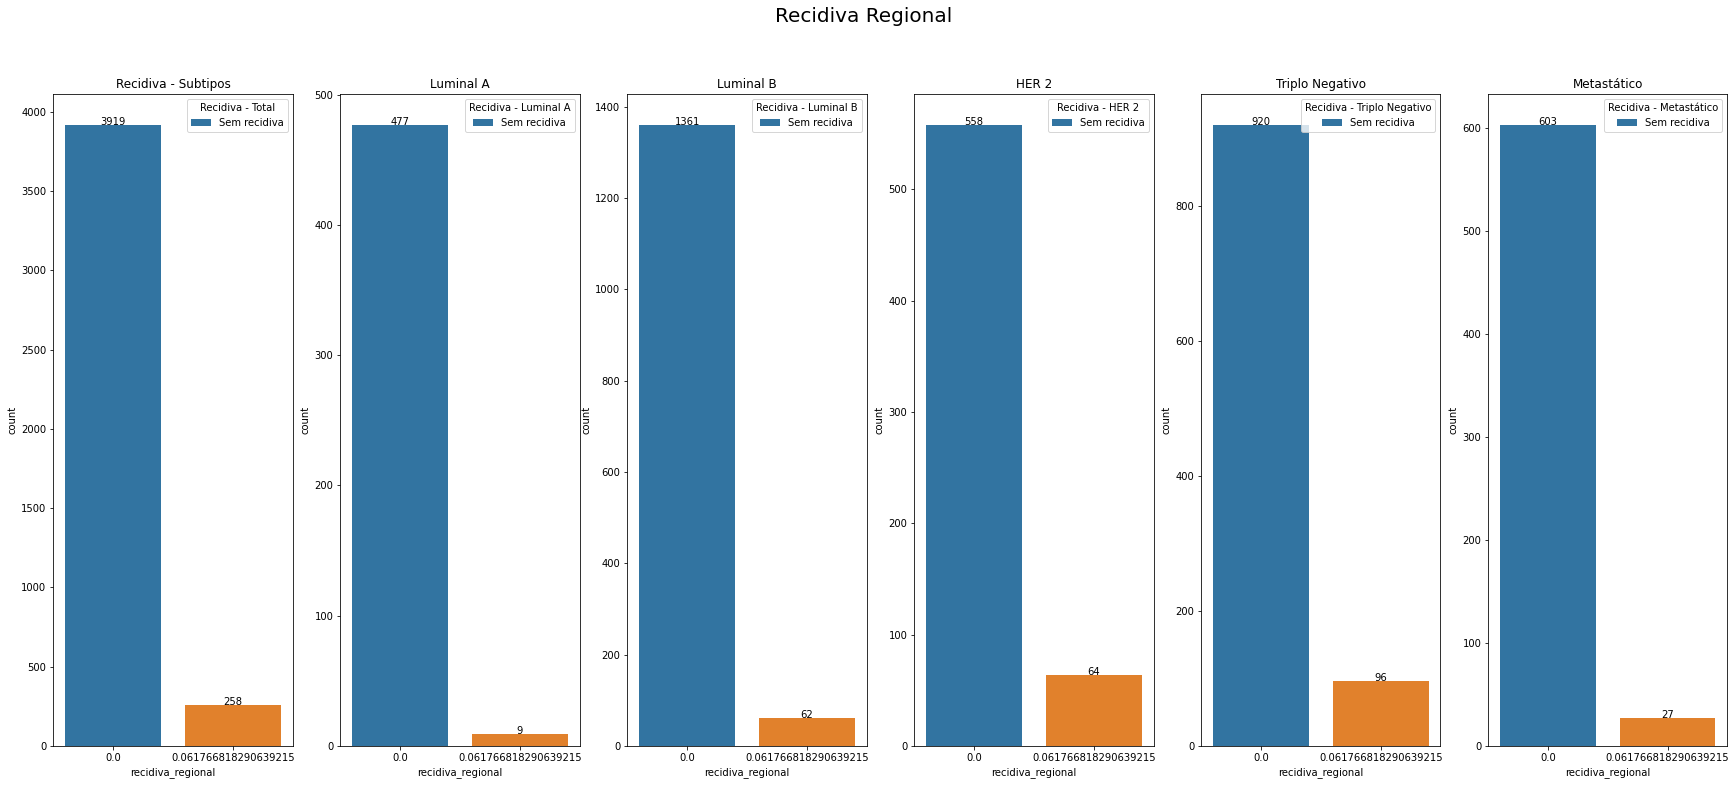

In [34]:
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Recidiva Regional', fontsize=20)
grafico = sns.countplot(x='recidiva_regional', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_regional', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_regional', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_regional', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_regional', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_regional', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

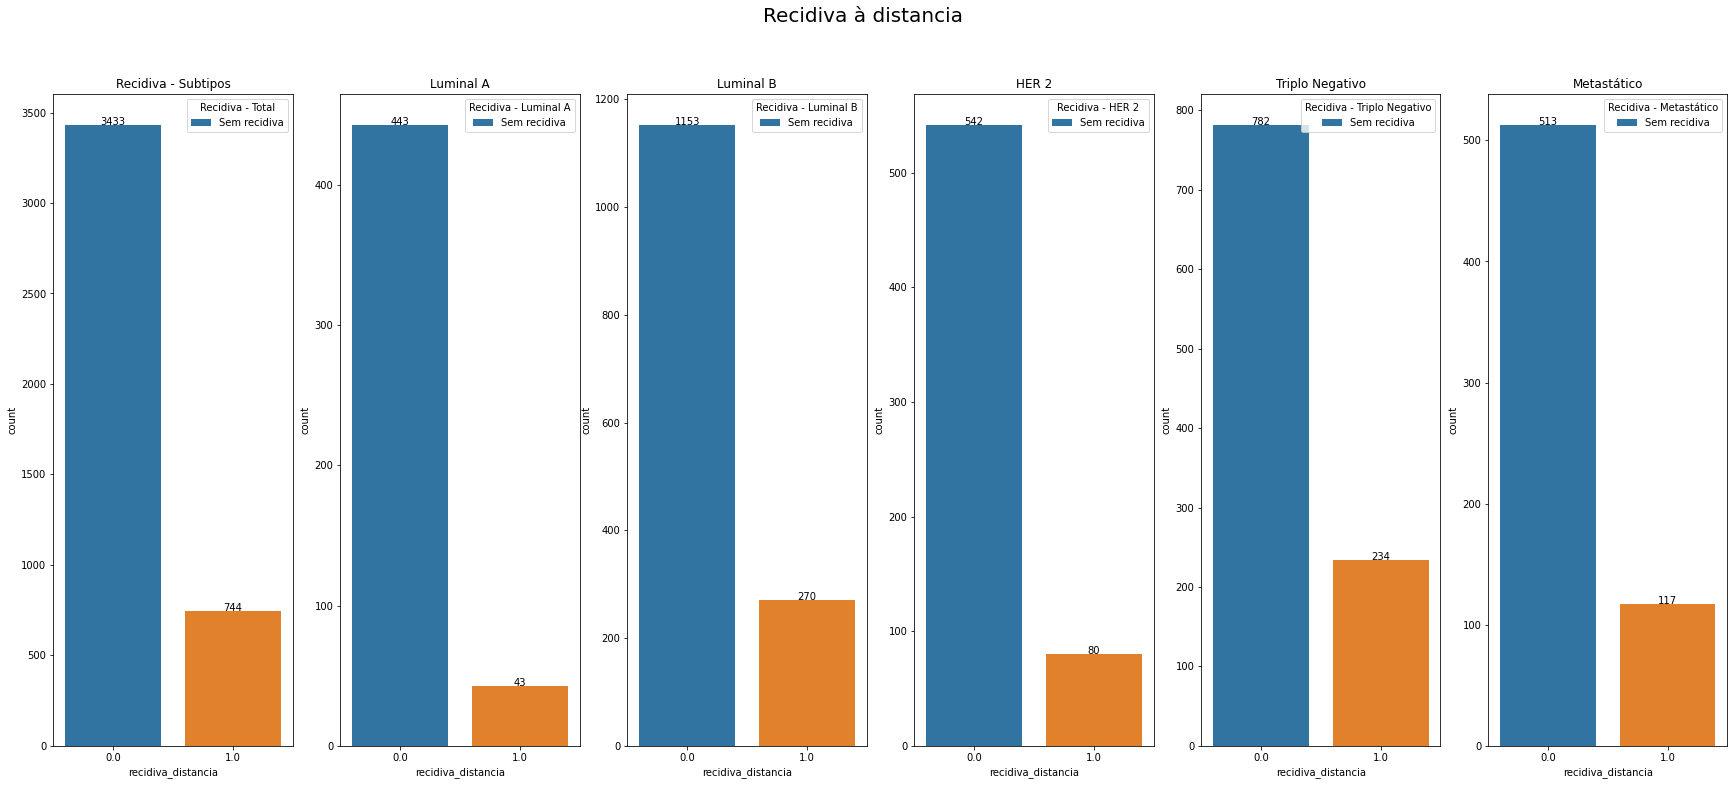

In [35]:
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Recidiva à distancia', fontsize=20)
grafico = sns.countplot(x='recidiva_distancia', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_distancia', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_distancia', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_distancia', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_distancia', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_distancia', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

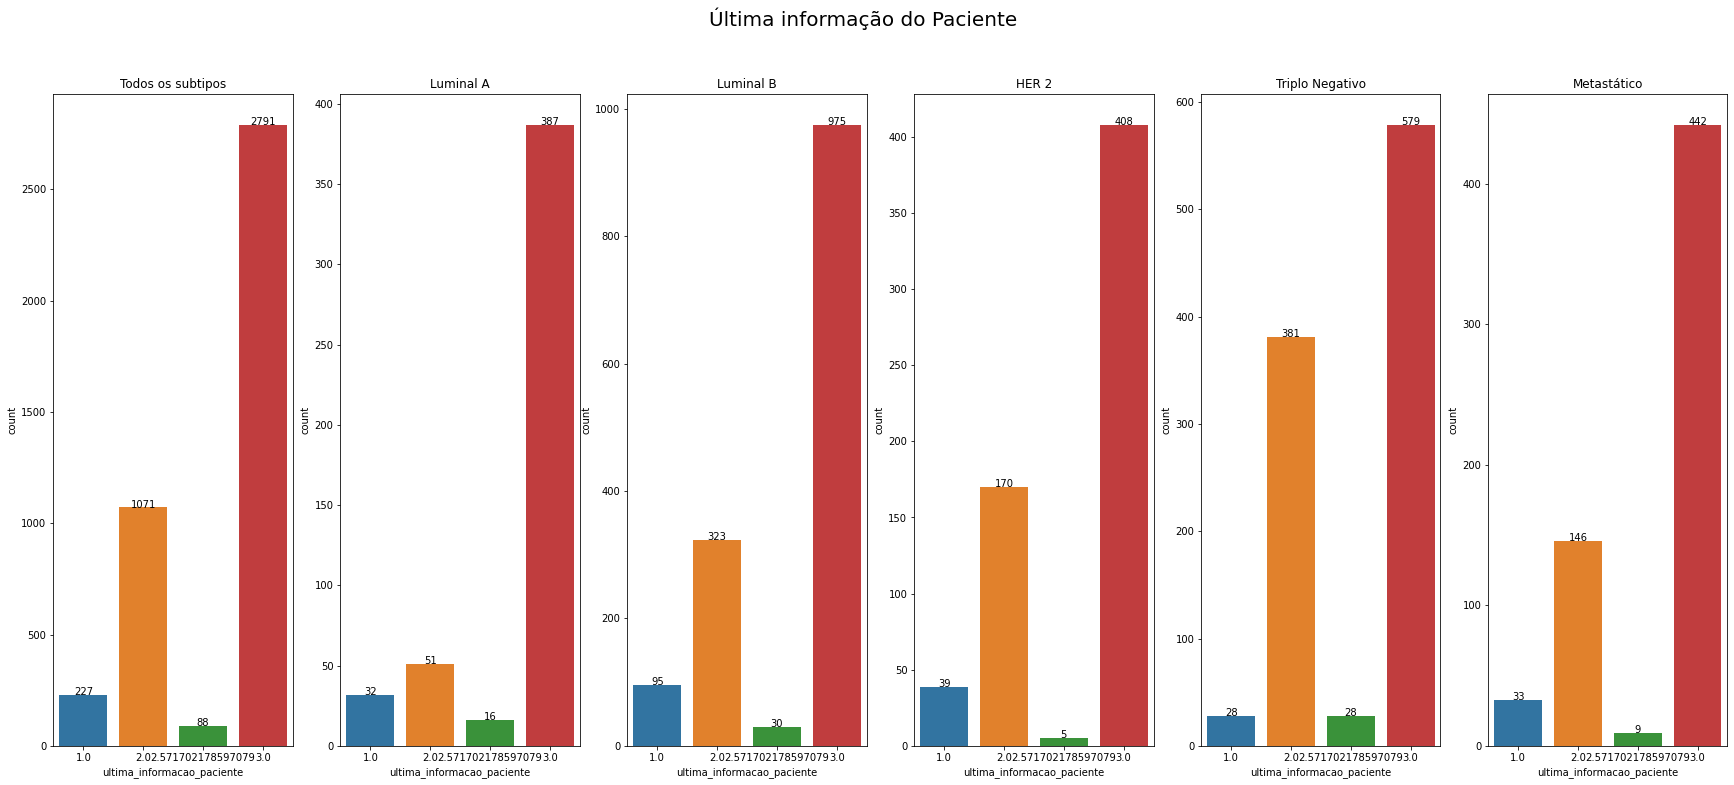

In [36]:
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Última informação do Paciente', fontsize=20)
grafico = sns.countplot(x='ultima_informacao_paciente', data = merged_df)
plt.title('Todos os subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='ultima_informacao_paciente', data = tumor1)
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='ultima_informacao_paciente', data = tumor2)
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='ultima_informacao_paciente', data = tumor3)
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='ultima_informacao_paciente', data = tumor4)
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='ultima_informacao_paciente', data = tumor5)
plt.title('Metastático')
plt.show

for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
     